In [60]:
import json
import pandas as pd

from datasets import load_dataset,get_dataset_split_names, get_dataset_config_names #hugging face datasets

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("pastel"))

# Data preview

In [2]:
import requests
API_URL = "https://datasets-server.huggingface.co/first-rows?dataset=dbpedia_14&config=dbpedia_14&split=train"
def query():
    response = requests.request("GET", API_URL)
    return response.json()
data = query()


In [3]:
data.keys()

dict_keys(['dataset', 'config', 'split', 'features', 'rows'])

In [4]:
pd.DataFrame([line["row"] for line in data["rows"]])

,label,title,content
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
95,0,Aegon,Aegon N.V. is a multinational life insurance ...
96,0,Parliamentary Monitoring Services,Parliamentary Monitoring Services is a United...
97,0,Rossiya Bank,The Rossiya Bank (Bank Rossiya in Russian: Ак...
98,0,Third Wire,Third Wire Productions Inc. (also known simpl...


# Data downloading

In [5]:
get_dataset_split_names("dbpedia_14")

['train', 'test']

In [6]:
get_dataset_config_names("dbpedia_14")

['dbpedia_14']

In [7]:
data_train = load_dataset("dbpedia_14", split = "train")
data_test = load_dataset("dbpedia_14", split = "test")

Found cached dataset dbpedia_14 (/Users/javier/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
Found cached dataset dbpedia_14 (/Users/javier/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)


In [8]:
data_train

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 560000
})

In [9]:
data_test

Dataset({
    features: ['label', 'title', 'content'],
    num_rows: 70000
})

In [10]:
# For some reason slicing loads faster the dataset (23s vs 1.9s)
df_train = pd.DataFrame(data_train[:560000])
df_train

,label,title,content
0,0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
559995,13,Barking in Essex,Barking in Essex is a Black comedy play direc...
559996,13,Science & Spirit,Science & Spirit is a discontinued American b...
559997,13,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...
559998,13,Razadarit Ayedawbon,Razadarit Ayedawbon (Burmese: ရာဇာဓိရာဇ် အရေး...


In [11]:
# it has only 70000 rows, but for some reason slicing loads faster the dataset
df_test = pd.DataFrame(data_test[:70000])
df_test.head()

,label,title,content
0,0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
1,0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
2,0,Henkel,Henkel AG & Company KGaA operates worldwide w...
3,0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...


### Labels distribution

The data is completely balanced, as shown in the plots

[Text(0.5, 1.0, 'Histogram of training set labels')]

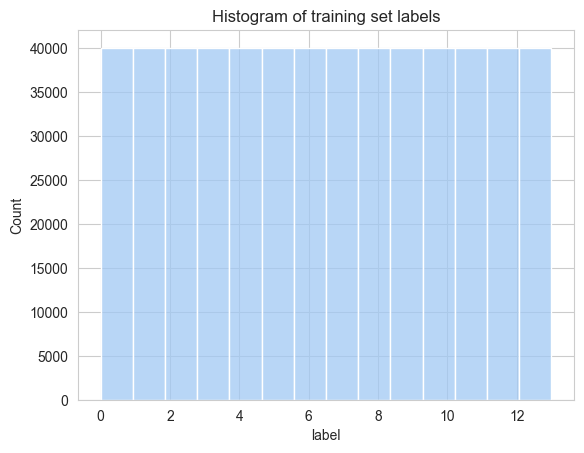

In [64]:
ax = sns.histplot(data=df_train, x="label", bins = len(df_train["label"].unique()))
ax.set(title = "Histogram of training set labels")

[Text(0.5, 1.0, 'Histogram of training set labels')]

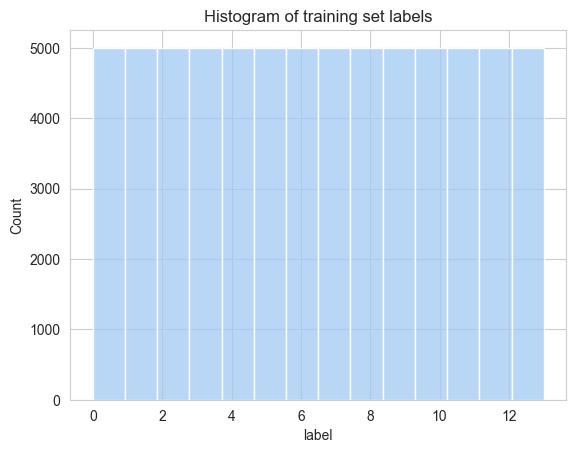

In [63]:
ax = sns.histplot(data=df_test, x="label", bins = len(df_test["label"].unique()))
ax.set(title = "Histogram of training set labels")

### Cleaning data:

We have some text with non-english characters

In [16]:
def isEnglish(s):
    try:
        s["content"].encode(encoding='utf-8').decode('ascii')
        s["title"].encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        pass
    else:
        return s

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560000 entries, 0 to 559999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    560000 non-null  int64 
 1   title    560000 non-null  object
 2   content  560000 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.8+ MB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    70000 non-null  int64 
 1   title    70000 non-null  object
 2   content  70000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [37]:
df_train_with_na = df_train.apply(isEnglish, axis=1)
df_test_with_na = df_test.apply(isEnglish, axis=1)


In [75]:
examples_non_english_train = df_train[df_train_with_na.isna()].dropna(how="any")
examples_non_english_train.head()

,label,title,content
2,0.0,Q-workshop,Q-workshop is a Polish company located in Poz...
10,0.0,Angstrem (company),Angstrem Group (Russian: ОАО «Ангстрем» named...
12,0.0,JVC,Victor Company of Japan Ltd (日本ビクター株式会社 Nippo...
13,0.0,Toei Bus,The Toei Bus (都営バス Toei Basu) is a bus servic...
18,0.0,CIB Bank,CIB Bank is the second-biggest commercial ban...


In [36]:
examples_non_english_test = df_test[df_test_with_na.isna()].dropna(how="any")
examples_non_english_test.head()

,label,title,content
0,0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
2,0,Henkel,Henkel AG & Company KGaA operates worldwide w...
5,0,Pošte Srpske,Pošte Srpske is one of three companies respon...
13,0,Shell Oil Company,Shell Oil Company is the United States-based ...
22,0,Korchma Taras Bulba,Korchma Taras Bulba – the chain of restaurant...


In [38]:
clean_df_train = df_train_with_na.dropna(how="any")
clean_df_train

,label,title,content
0,0.0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,0.0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
3,0.0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,0.0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
5,0.0,The Unsigned Guide,The Unsigned Guide is an online contacts dire...
...,...,...,...
559994,13.0,Scoliosis (journal),Scoliosis (ISSN 1748-7161) is an open-access ...
559995,13.0,Barking in Essex,Barking in Essex is a Black comedy play direc...
559996,13.0,Science & Spirit,Science & Spirit is a discontinued American b...
559997,13.0,The Blithedale Romance,The Blithedale Romance (1852) is Nathaniel Ha...


In [42]:
clean_df_test = df_test[~df_test_with_na.isna()]
clean_df_test.head()

,label,title,content
1,0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
3,0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
6,0,Open Kernel Labs,Open Kernel Labs (OK Labs) is a privately own...
7,0,Skye Bank,Skye Bank Plc. commonly known as Skye Bank is...
...,...,...,...
69992,13,Sometimes the Magic Works,Sometimes the Magic Works: Lessons from a Wri...
69993,13,Zia (novel),Zia is the sequel to the award-winning Island...
69994,13,Scottish Socialist Voice,The Scottish Socialist Voice is a political n...
69995,13,Energy Victory,Energy Victory: Winning the War on Terror by ...


Deleting rows containing non-english characters has made the dataset unbalanced. This is something to take into account for future iterations. 

[Text(0.5, 1.0, 'Histogram of training set labels')]

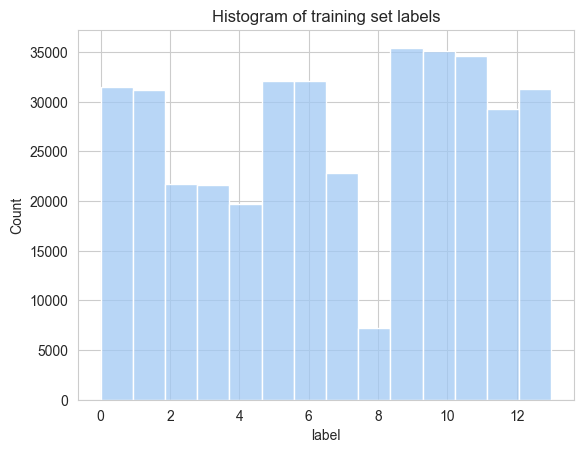

In [61]:
ax = sns.histplot(data=clean_df_train, x="label", bins = len(clean_df_train["label"].unique()))
ax.set(title = "Histogram of training set labels")

[Text(0.5, 1.0, 'Histogram of training set labels')]

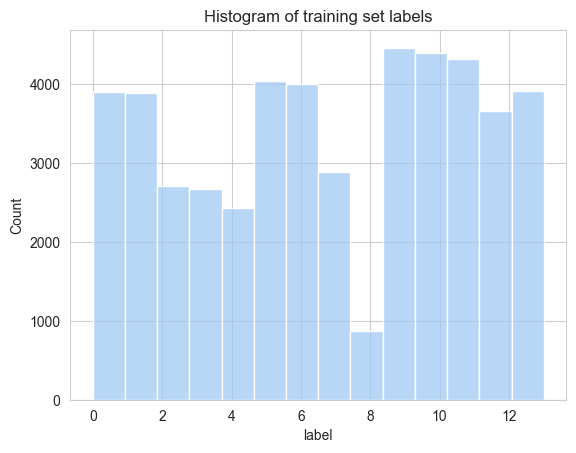

In [62]:
ax = sns.histplot(data=clean_df_test, x="label", bins = len(clean_df_test["label"].unique()))
ax.set(title = "Histogram of training set labels")

### Saving the data in reduced csv files

In [65]:
clean_df_train.to_csv('clean_df_train.csv', index=False)
clean_df_test.to_csv('clean_df_test.csv', index=False)